
# <center> Python Code </center>

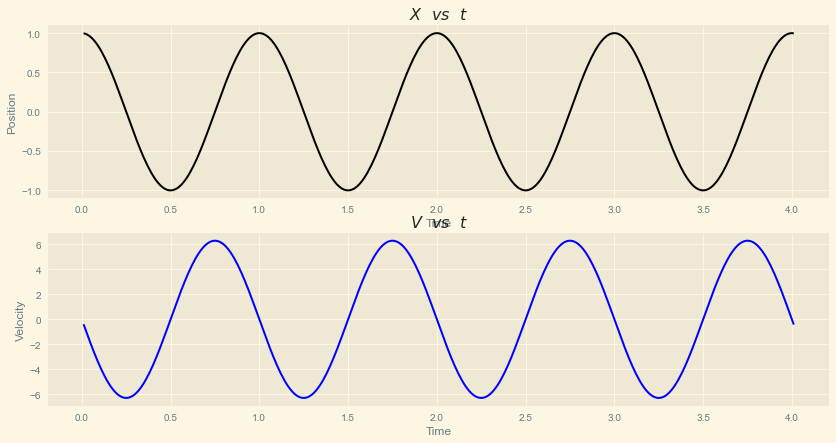

In [1]:
# verlet algorithm

# Import libraries 
from matplotlib import pylab as plt   
import numpy as m
from matplotlib import style
style.use('seaborn')
style.use('Solarize_Light2')

# imagine a simpler situation when you have simply an oscillating pendulum in vacuum and fixed pivot. 
# defining the acceleration
def A(X):
    return -4*m.pi*m.pi*X  #acceleration

# defining the energy
# this is essentially total energy, it is taking two variable because to define each state you always need both position and velocity of particle.
def erg(x, v):
    return (0.25*v*v)/(m.pi * m.pi)  + x ** 2 

# INITIAL CONDITIONS and PARAMETERS of SIMULATION
X= 1.0
V= 0.0
T= 0.0
T_end = 4
d_T = 0.01



# again defining our historians 
time_list = []
position_list = []
energy_list = []
velocity_list =[]



# main loop where we are implimenting our algorithm recursively.
# you can omit 0 in the paranthesis of loop since it's default initial value is 0.
while(T<=T_end):  
    

    ##Position verlet
    X = X + d_T * 0.5 * V
    V = V + d_T * A(X)
    X = X + d_T * 0.5 * V

    # notice above; how updated variables are getting used. 

    T=T+d_T

    time_list.append(T)
    position_list.append(X)
    energy_list.append(erg(X,V))
    velocity_list.append(V)

    
# This is to fix size of plot 
fig,((ax1),(ax2)) = plt.subplots(nrows = 2,ncols= 1,figsize = (14,7))

ax1.set_ylabel("Position")
ax1.set_xlabel("Time")
ax1.set_title(r'$X \ \ vs \ \ t $')
ax1.plot(time_list,position_list,'k')

ax2.set_ylabel("Velocity")
ax2.set_xlabel("Time")
ax2.set_title(r'$V \ \ vs \ \ t $')
ax2.plot(time_list,velocity_list,'b')
plt.savefig('blogimage.jpg',format = 'jpg')
plt.show()

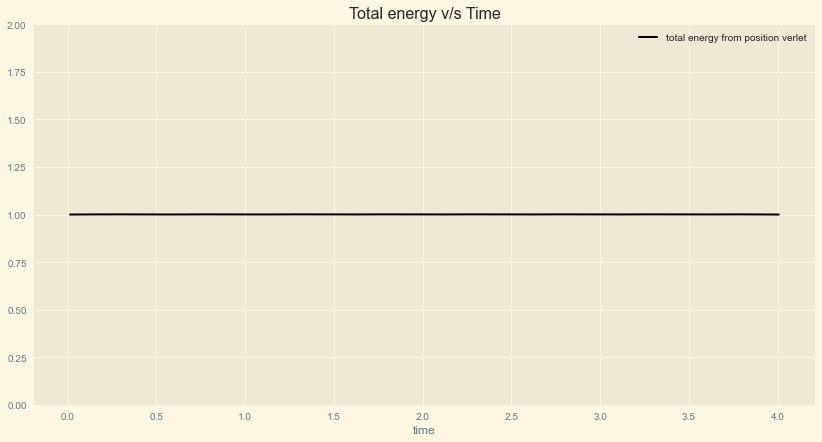

In [2]:
## total Energy 
# you can plot simply kinetic energy but essentially we want to see it's error. 
# also we can use any algorithm it doesn't matter in energy analysis
plt.figure(figsize=(14,7))
plt.title("Total energy v/s Time")
plt.xlabel("time")

# you should be thinking we didn't add it before in previous codes, you can see why we added it now after removing it.
plt.ylim(0,2)
plt.plot(time_list,energy_list,color='black',label='total energy from position verlet')
plt.legend()
plt.show()